# New York City TLC Trip Record

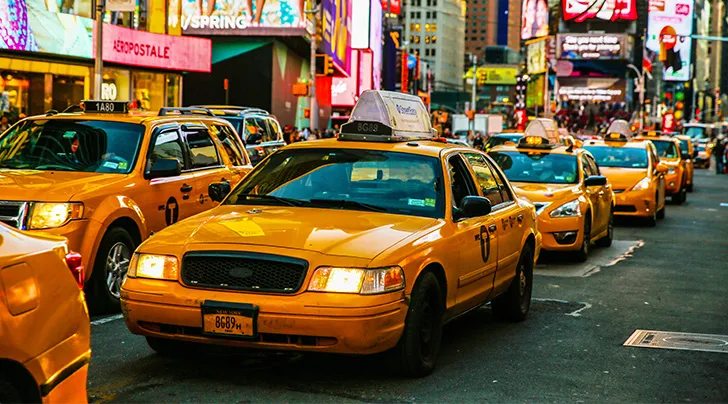

# Latar Belakang
NYC TLC (New York City Taxi and Limousine Commission) adalah badan pemerintah yang mengatur dan mengawasi industri taksi dan limusin di New York City. Tugas utama TLC meliputi:

1. Regulasi: Menetapkan peraturan dan standar untuk taksi, termasuk pengemudi dan kendaraan.

1. Lisensi: Menerbitkan lisensi untuk pengemudi taksi dan kendaraan, serta memastikan kepatuhan terhadap peraturan.

1. Keamanan: Memastikan bahwa kendaraan dan pengemudi memenuhi standar keselamatan dan keamanan.

1. Penegakan Hukum: Menyidik dan menindak pelanggaran peraturan, serta menangani keluhan dari penumpang.

NYC TLC menyediakan dataset tentang riwayat perjalanan taksi pada rentang 1 Januari 2023 sampai 31 Januari 2023. Dengan harapan dataset ini dapat dianalisa untuk bisa meningkatkan kinerja taksi.

# Stakeholder
Deputy Chief of Staff, bertugas meningkatkan efisiensi, kolaborasi, dan konsistensi rekomendasi kebijakan.

# Problem Statement
- Apakah ada perbedaan pola perjalanan yang terjadi selama periode Januari 2023 pada setiap Borough di Kota New york?

### Import Data
Pada tahap ini, saya akan meng-import data `NYC TLC Trip Record.csv` dan melihat jumlah kolom dan baris, dan tipe data tiap kolom

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('NYC TLC Trip Record.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Pada dataset NYC TLC Trip Record, terdapat 20 kolom dengan jumlah baris sebanyak 68210. Berikut penjelasan tentang masing-masing kolom:  

- `VendorID`: A code indicating the LPEP provider that provided the record.
    1. Creative Mobile Technologies, LLC.
    2. VeriFone Inc.

- `lpep_pickup_datetime`: The date and time when the meter was engaged.

- `lpep_dropoff_datetime`: The date and time when the meter was disengaged.

- `store_and_fwd_flag`: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip

- `RatecodeID`: The final rate code is in effect at the end of the trip.
    1. Standard rate
    2. JFK
    3. Newark
    4. Nassau or Westchester
    5. Negotiated fare
    6. Group ride

- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged

- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.

- `passenger_count`: The number of passengers in the vehicle. This is a driver-entered value.

- `trip_distance`: The elapsed trip distance in miles was reported by the taximeter.

- `fare_amount`: The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- `extra`

- `mta_tax`: $0.50 MTA tax that is automatically triggered based
on the metered rate in use.

- `tip_amount`: This field is automatically populated for credit card
tips. Cash tips are not included.

- `tolls_amount`: The total amount of all tolls paid in the trip.

- `e-hail`: Booking a taxi through a mobile app.

- `improvement_surcharge`: $0.30 improvement surcharge assessed on hailed
trips at the flag
drop. The improvement surcharge began being
levied in 2015.

- `total_amount`: The total amount charged to passengers. Does not
include cash tips.

- `payment_type`: A numeric code signifying how the passenger paid
for the trip.
    1. Credit card
    2. Cash
    3. No charge
    4. Dispute
    5. Unknown
    6. Voided trip

- `trip_type`: A code indicating whether the trip was a street hail
or a dispatch that is automatically assigned based
on the metered rate in use but can be altered by the
driver.
    1. Street-hail
    2. Dispatch

- `congestion_surcharge`: New York State Congestion Surcharge of $2.50 (Yellow Taxi) or $2.75 (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.


Lalu saya akan meng-import data `taxi_zone_lookup.csv` untuk tambahan informasi terkait `PULocationID` dan `DOLocationID`

In [3]:
df_loc=pd.read_csv('taxi_zone_lookup.csv')
display(df_loc,df_loc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


None

In [4]:
# PULocationID
df=df.rename(columns={'PULocationID':'LocationID'})
df=pd.merge(df,df_loc,how='left', on='LocationID')
df.rename(columns={'LocationID':'PU_LocationID', 'Borough':'PU_Borough','Zone':'PU_Zone','service_zone':'PU_service_zone'},inplace=True)

# DOLocationID
df=df.rename(columns={'DOLocationID':'LocationID'})
df=pd.merge(df,df_loc,how='left', on='LocationID')
df.rename(columns={'LocationID':'DO_LocationID', 'Borough':'DO_Borough','Zone':'DO_Zone','service_zone':'DO_service_zone'},inplace=True)
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


### Duplicate Data
Pada tahap ini saya akan memeriksa apakah terdapat data duplikat pada dataset.

In [5]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset secara keseluruhan.  Namun dengan asumsi bahwa data duplikat juga dapat dilihat berdasarkan beberapa kolom diantaranya :`lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PU_Zone`, `DO_Zone`, `passenger_count`dan `trip_distance`.

In [6]:
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PU_Zone', 'DO_Zone', 'passenger_count', 'trip_distance'], keep=False)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,NaN,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,NaN,-1.0,-11.0,4.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN


Dari hasil pemeriksaan menggunakkan kolom-kolom tersebut, terdapat data duplikat dimana data yang pertama memiliki nilai negatif, sementara data yang kedua memiliki nilai negatif. Sehingga data dengan nilai negatif tidak diikutsertakan.

In [7]:
df=df[df['fare_amount']>0]
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PU_Zone', 'DO_Zone', 'passenger_count', 'trip_distance'], keep=False)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone


### Missing Values
Pada tahap ini saya akan memeriksa terkait missing values pada dataset `NYC TLC Trip Record`.

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67952 non-null  int64  
 1   lpep_pickup_datetime   67952 non-null  object 
 2   lpep_dropoff_datetime  67952 non-null  object 
 3   store_and_fwd_flag     63633 non-null  object 
 4   RatecodeID             63633 non-null  float64
 5   PU_LocationID          67952 non-null  int64  
 6   DO_LocationID          67952 non-null  int64  
 7   passenger_count        63633 non-null  float64
 8   trip_distance          67952 non-null  float64
 9   fare_amount            67952 non-null  float64
 10  extra                  67952 non-null  float64
 11  mta_tax                67952 non-null  float64
 12  tip_amount             67952 non-null  float64
 13  tolls_amount           67952 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  improve

None

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4319
RatecodeID                4319
PU_LocationID                0
DO_LocationID                0
passenger_count           4319
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                67952
improvement_surcharge        0
total_amount                 0
payment_type              4319
trip_type                 4329
congestion_surcharge      4319
PU_Borough                  65
PU_Zone                    130
PU_service_zone            195
DO_Borough                 240
DO_Zone                    413
DO_service_zone            653
dtype: int64

<Axes: >

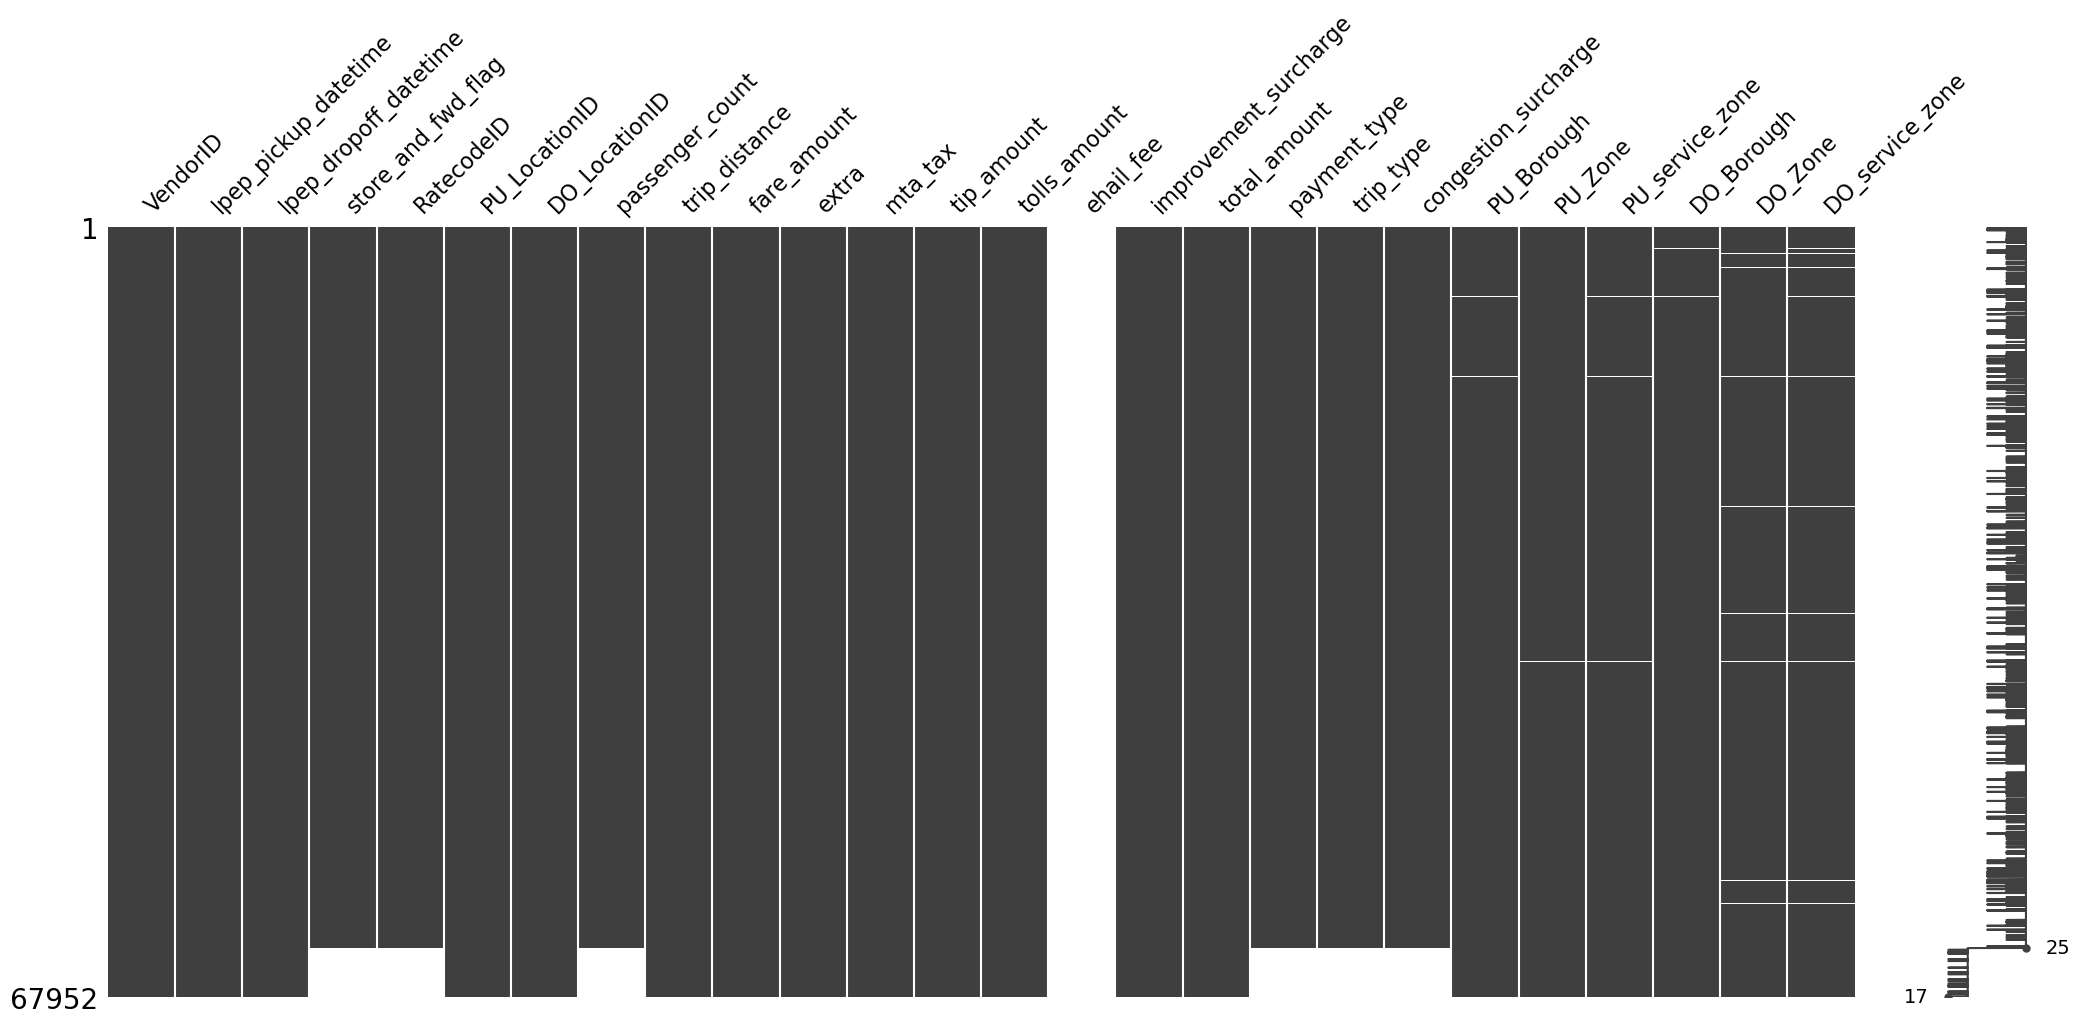

In [8]:
display(df.info(),df.isna().sum(),msno.matrix(df))

Dari hasil pemeriksaan, terdapat missing value pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`, `PU_Borough`, `PU_Zone`, `PU_service_zone`, `DO_Borough`, `DO_Zone` dan `DO_service_zone`.

Ehail-fee merupakan biaya yang dikenakan kepada penumpang yang memesan taksi secara daring melalui aplikasi. Kolom ini kosong karena berdasarkan dari kolom `trip_type`, tipe perjalanan hanya melalui street-hail dan dispatch, sehingga kolom `ehail_fee` dapat dihapus.

In [9]:
df=df.drop('ehail_fee',axis=1)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


Lalu, pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type` dan `congestion_surcharge` jumlah dan persebaran data missing value pada kolom tersebut sama, sehingga baris yang memiliki missing value dapat dihapus.

Begitu juga terdapat missing value pada kolom `PU_Borough`, `PU_Zone`, `PU_service_zone`, `DO_Borough`, `DO_Zone` dan `DO_service_zone` karena terdapat missing value pada dataset `taxi_zone_lookup`, sehingga baris yang memiliki missing value dapat dihapus.

In [10]:
# Drop Missing Value (NaN)
df.dropna(inplace=True)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


### Data Formatting
Pada tahap ini saya akan melihat dan menyesuaikan tipe data pada kolom yang ada di dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62947 entries, 0 to 63886
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               62947 non-null  int64  
 1   lpep_pickup_datetime   62947 non-null  object 
 2   lpep_dropoff_datetime  62947 non-null  object 
 3   store_and_fwd_flag     62947 non-null  object 
 4   RatecodeID             62947 non-null  float64
 5   PU_LocationID          62947 non-null  int64  
 6   DO_LocationID          62947 non-null  int64  
 7   passenger_count        62947 non-null  float64
 8   trip_distance          62947 non-null  float64
 9   fare_amount            62947 non-null  float64
 10  extra                  62947 non-null  float64
 11  mta_tax                62947 non-null  float64
 12  tip_amount             62947 non-null  float64
 13  tolls_amount           62947 non-null  float64
 14  improvement_surcharge  62947 non-null  float64
 15  total_a

In [12]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PU_LocationID', 'DO_LocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone'],
      dtype='object')

In [13]:
df['VendorID'] = df['VendorID'].astype('category')
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('int').astype('category')
df['PU_LocationID'] = df['PU_LocationID'].astype('category')
df['DO_LocationID'] = df['DO_LocationID'].astype('category')
df['passenger_count'] = df['passenger_count'].astype('int')
df['payment_type'] = df['payment_type'].astype('int').astype('category')
df['trip_type'] = df['trip_type'].astype('int').astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62947 entries, 0 to 63886
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62947 non-null  category      
 1   lpep_pickup_datetime   62947 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62947 non-null  datetime64[ns]
 3   store_and_fwd_flag     62947 non-null  category      
 4   RatecodeID             62947 non-null  category      
 5   PU_LocationID          62947 non-null  category      
 6   DO_LocationID          62947 non-null  category      
 7   passenger_count        62947 non-null  int32         
 8   trip_distance          62947 non-null  float64       
 9   fare_amount            62947 non-null  float64       
 10  extra                  62947 non-null  float64       
 11  mta_tax                62947 non-null  float64       
 12  tip_amount             62947 non-null  float64       
 13  tolls_

### Data Range
Pada tahap ini saya akan memeriksa

In [14]:
display(df.describe(include='number'),df.describe(exclude=['number', 'datetime']),df.describe(include='datetime'))

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000,62947.000000
mean,1.317044,2.559456,15.944134,0.891798,0.632199,2.042019,0.139968,0.956052,21.099333,0.737207
std,0.981267,6.738816,12.446401,1.292682,0.359588,2.916738,0.983546,0.170977,14.300349,1.218077
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000
25%,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.610000,0.000000
50%,1.000000,1.800000,12.800000,0.000000,0.500000,1.490000,0.000000,1.000000,17.500000,0.000000
75%,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.380000,2.750000
max,9.000000,1571.970000,490.000000,7.500000,1.500000,222.220000,36.050000,1.000000,491.000000,2.750000


,VendorID,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,payment_type,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
count,62947,62947,62947,62947,62947,62947,62947,62947,62947,62947,62947,62947,62947
unique,2,2,5,218,246,5,2,5,217,3,6,245,4
top,2,N,1,74,75,1,1,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone
freq,53912,62665,61519,12907,3395,40211,61822,37280,12907,59020,37302,3395,40791


,lpep_pickup_datetime,lpep_dropoff_datetime
count,62947,62947
mean,2023-01-16 20:40:26.778305280,2023-01-16 20:58:19.516990720
min,2009-01-01 20:21:27,2009-01-02 11:07:31
25%,2023-01-09 12:37:29.500000,2023-01-09 12:53:28
50%,2023-01-17 08:52:28,2023-01-17 09:07:58
75%,2023-01-24 16:19:30.500000,2023-01-24 16:37:27.500000
max,2023-02-01 03:10:05,2023-02-01 17:27:05


Terdapat nilai 0 pada kolom `passenger_count` dan `trip_distance`, sehingga saya akan menghapus baris yang mengandung 0. 

Menurut aturan yang berlaku, biaya awal dari taksi adalah sebesar 3$, sehingga baris yang mengandung `fare_amount` dibawah 3$ dapat dihapus.

In [15]:
df=df[(df['fare_amount']>=3) & (df['passenger_count']>0) & (df['trip_distance']>0)]
df.describe(include='number')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000
mean,1.331881,2.675947,15.754971,0.914334,0.614682,2.099482,0.125258,0.955552,21.002941,0.764097
std,0.991317,6.882009,11.402460,1.300293,0.334795,2.929245,0.925136,0.171548,13.482939,1.231780
min,1.000000,0.010000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000
25%,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.740000,0.000000
50%,1.000000,1.880000,12.800000,0.000000,0.500000,1.660000,0.000000,1.000000,17.460000,0.000000
75%,1.000000,3.140000,18.400000,2.500000,0.500000,3.280000,0.000000,1.000000,25.200000,2.750000
max,8.000000,1571.970000,455.000000,7.500000,1.500000,222.220000,36.050000,1.000000,456.000000,2.750000


Terdapat nilai Unknown pada data terkait `PU_LocationID` dan `DO_LocationID` sehingga data tersebut tidak diikutsertakan.

In [16]:
df=df[(df['DO_Borough']!='Unknown') & (df['PU_Borough']!='Unknown') ]

Terdapat data diluar data yang akan dianalisa (1 Januari 2023 - 31 Jannuari 2023) pada kolom `lpep_pickup_datetime`, sehingga baris yang mengandung nilai tersebut dapat dihapus.

In [17]:
df= df[(df['lpep_pickup_datetime']>= '2023-01-01') & (df['lpep_pickup_datetime']< '2023-02-01') ]

Selanjutnya akan dibuat kolom baru yaitu `trip_duration`. Dimana `trip_duration` didapatkan dari selisih antara `lpep_dropoff_datetime` dengan `lpep_pickup_datetime`. Dan juga akan dibuat kolom lain terkait waktu.

In [18]:
df["hour"] = df["lpep_pickup_datetime"].dt.hour
df['day'] = df['lpep_pickup_datetime'].dt.strftime('%A').astype('category')
df['weekend'] = np.where((df['day']=='Sunday')|(df['day']=='Saturday'),1,0)
df['pickup_date']= df['lpep_pickup_datetime'].dt.strftime("%d")
df['pickup_time']= df['lpep_pickup_datetime'].dt.time

df['trip_duration'] = round((df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60,2)
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,hour,day,weekend,pickup_date,pickup_time,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,0,Sunday,1,01,00:26:10,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,0,Sunday,1,01,00:51:03,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,0,Sunday,1,01,00:13:14,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,0,Sunday,1,01,00:33:04,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2,1,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,0,Sunday,1,01,00:53:31,17.55


Terdapat nilai 0 pada kolom `trip_duration` sehingga baris yang memiliki nilai 0 dapat dihapus.

In [19]:
df=df[(df['trip_duration']>0)]

Menurut website [link](https://newyorkpass.com/en/things-to-do/cab-etiquette-in-nyc), tip yang direkomendasikan adalah sebesar 20 %, sehingga saya akan batasi tip diangka 30 %. Untuk itu, saya akan membuat kolom baru `tip_percent`.

In [20]:
df['tip_percent']=100*(df['tip_amount']/df['total_amount'])
df[df['tip_percent']>30]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,hour,day,weekend,pickup_date,pickup_time,trip_duration,tip_percent
297,2,2023-01-01 06:36:05,2023-01-01 06:58:19,N,1,196,186,2,7.63,33.8,0.0,0.5,54.00,6.55,1.0,98.60,1,1,2.75,Queens,Rego Park,Boro Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone,6,Sunday,1,01,06:36:05,22.23,54.766734
320,2,2023-01-01 07:52:09,2023-01-01 07:56:18,N,1,41,166,1,0.69,6.5,0.0,0.5,7.00,0.00,1.0,15.00,1,1,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Morningside Heights,Boro Zone,7,Sunday,1,01,07:52:09,4.15,46.666667
1078,2,2023-01-01 19:07:06,2023-01-01 19:12:37,N,1,166,41,1,0.70,7.2,0.0,0.5,4.00,0.00,1.0,12.70,1,1,0.00,Manhattan,Morningside Heights,Boro Zone,Manhattan,Central Harlem,Boro Zone,19,Sunday,1,01,19:07:06,5.52,31.496063
1082,2,2023-01-01 19:06:41,2023-01-01 19:23:17,N,1,179,129,1,2.81,12.5,0.0,0.5,14.64,0.00,0.3,29.89,1,1,0.00,Queens,Old Astoria,Boro Zone,Queens,Jackson Heights,Boro Zone,19,Sunday,1,01,19:06:41,16.60,48.979592
1270,2,2023-01-01 23:21:41,2023-01-01 23:37:20,N,1,263,145,1,4.12,19.1,1.0,0.5,11.00,0.00,1.0,35.35,1,1,2.75,Manhattan,Yorkville West,Yellow Zone,Queens,Long Island City/Hunters Point,Boro Zone,23,Sunday,1,01,23:21:41,15.65,31.117397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63646,2,2023-01-31 20:19:58,2023-01-31 20:27:04,N,1,52,106,1,1.41,9.3,1.0,0.5,5.90,0.00,1.0,17.70,1,1,0.00,Brooklyn,Cobble Hill,Boro Zone,Brooklyn,Gowanus,Boro Zone,20,Tuesday,0,31,20:19:58,7.10,33.333333
63774,2,2023-01-31 22:29:19,2023-01-31 22:34:27,N,1,223,223,1,0.75,7.2,1.0,0.5,4.40,0.00,1.0,14.10,1,1,0.00,Queens,Steinway,Boro Zone,Queens,Steinway,Boro Zone,22,Tuesday,0,31,22:29:19,5.13,31.205674
63818,2,2023-01-31 22:29:51,2023-01-31 22:36:50,N,1,95,95,1,1.27,8.6,1.0,0.5,4.90,0.00,1.0,16.00,1,1,0.00,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,22,Tuesday,0,31,22:29:51,6.98,30.625000
63847,2,2023-01-31 23:42:33,2023-01-31 23:47:39,N,1,223,7,1,1.18,7.9,1.0,0.5,5.00,0.00,1.0,15.40,1,1,0.00,Queens,Steinway,Boro Zone,Queens,Astoria,Boro Zone,23,Tuesday,0,31,23:42:33,5.10,32.467532


In [21]:
df=df[df['tip_percent']<=30]
df.drop('tip_percent',axis=1,inplace=True)

Karena batas kecepatan di Kota New York adalah 25 mph, maka saya akan menambahkan kolom baru `speed`. Dimana jika nilai pada kolom `speed` lebih besar dari batas kecepatan, maka tidak diikut sertakan. Lalu kolom `speed` akan dihapus kembali.

In [22]:
df['speed']=df['trip_distance']/df['trip_duration']
df=df[df['speed']<25]
df.drop('speed', axis=1, inplace=True)
display(df.describe(include='number'),df.describe(exclude=['number', 'datetime']),df.describe(include='datetime'))

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,weekend,trip_duration
count,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000
mean,1.332204,2.652596,15.770468,0.915369,0.614608,2.055328,0.125506,0.955721,20.977743,0.766283,13.971717,0.245729,17.931914
std,0.991940,2.503107,11.398243,1.301435,0.334481,2.538285,0.926108,0.171221,13.397273,1.232861,5.172764,0.430522,77.677178
min,1.000000,0.010000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.030000
25%,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.700000,0.000000,10.000000,0.000000,7.280000
50%,1.000000,1.890000,12.800000,0.000000,0.500000,1.600000,0.000000,1.000000,17.490000,0.000000,15.000000,0.000000,11.170000
75%,1.000000,3.140000,18.400000,2.500000,0.500000,3.270000,0.000000,1.000000,25.200000,2.750000,18.000000,0.000000,16.700000
max,7.000000,66.180000,455.000000,7.500000,1.500000,33.940000,36.050000,1.000000,456.000000,2.750000,23.000000,1.000000,1438.930000


,VendorID,store_and_fwd_flag,RatecodeID,PU_LocationID,DO_LocationID,payment_type,trip_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,day,pickup_date,pickup_time
count,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647,59647
unique,2,2,5,182,242,4,2,5,181,3,6,241,4,7,31,39093
top,2,N,1,74,75,1,1,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,Tuesday,25,16:19:40
freq,52328,59404,58653,12652,3285,37814,58903,36392,12652,55833,36300,3285,38034,9894,2355,9


,lpep_pickup_datetime,lpep_dropoff_datetime
count,59647,59647
mean,2023-01-16 22:59:36.214126080,2023-01-16 23:17:32.128304896
min,2023-01-01 00:01:31,2023-01-01 00:13:26
25%,2023-01-09 12:37:43.500000,2023-01-09 12:53:28
50%,2023-01-17 09:19:59,2023-01-17 09:37:40
75%,2023-01-24 16:32:31,2023-01-24 16:50:31.500000
max,2023-01-31 23:58:23,2023-02-01 17:27:05


### Outlier
Pada tahap ini saya akan memeriksa data terkait outlier.

In [23]:
df.describe(include='number')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,weekend,trip_duration
count,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000,59647.000000
mean,1.332204,2.652596,15.770468,0.915369,0.614608,2.055328,0.125506,0.955721,20.977743,0.766283,13.971717,0.245729,17.931914
std,0.991940,2.503107,11.398243,1.301435,0.334481,2.538285,0.926108,0.171221,13.397273,1.232861,5.172764,0.430522,77.677178
min,1.000000,0.010000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.000000,0.000000,0.030000
25%,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.700000,0.000000,10.000000,0.000000,7.280000
50%,1.000000,1.890000,12.800000,0.000000,0.500000,1.600000,0.000000,1.000000,17.490000,0.000000,15.000000,0.000000,11.170000
75%,1.000000,3.140000,18.400000,2.500000,0.500000,3.270000,0.000000,1.000000,25.200000,2.750000,18.000000,0.000000,16.700000
max,7.000000,66.180000,455.000000,7.500000,1.500000,33.940000,36.050000,1.000000,456.000000,2.750000,23.000000,1.000000,1438.930000


Terdapan nilai yang sangan tinggi dari kolom `trip_distance`, `fare_amount`, `tip_amount`, `total_amount` dan `trip_duration`.

In [24]:
# trip_distance

Q3 = df['trip_distance'].quantile(0.75)
Q1 = df['trip_distance'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lowerbound: {lower_bound}, Upperbound: {upper_bound}')
df[(df['trip_distance']<lower_bound) | (df['trip_distance']>upper_bound)][['trip_distance', 'fare_amount', 'tip_amount', 'total_amount','trip_duration']].sort_values('trip_distance')

Lowerbound: -1.7100000000000002, Upperbound: 6.050000000000001


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration
50447,6.06,22.5,7.32,36.62,32.27
31050,6.06,30.3,6.91,41.46,23.50
3214,6.06,33.8,7.61,45.66,30.82
28657,6.06,26.8,5.86,35.16,17.88
56847,6.06,30.3,0.00,34.55,23.27
...,...,...,...,...,...
9536,36.61,161.2,32.54,195.24,107.77
40942,38.24,140.2,0.00,160.50,55.33
37830,38.60,140.2,10.00,175.00,65.22
8072,41.74,114.0,0.00,133.10,86.33


In [25]:
# total_amount

Q3 = df['total_amount'].quantile(0.75)
Q1 = df['total_amount'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lowerbound: {lower_bound}, Upperbound: {upper_bound}')
df[(df['total_amount']<lower_bound) | (df['total_amount']>upper_bound)][['trip_distance', 'fare_amount', 'tip_amount', 'total_amount','trip_duration']].sort_values('total_amount')

Lowerbound: -6.050000000000001, Upperbound: 43.95


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration
2856,7.28,32.4,7.33,43.98,23.62
47380,3.27,32.4,7.33,43.98,38.58
529,6.80,32.4,7.33,43.98,23.22
43522,7.97,32.4,7.33,43.98,19.43
27099,6.52,32.4,7.33,43.98,24.08
...,...,...,...,...,...
7731,25.48,348.1,0.00,349.60,461.00
61656,0.02,399.0,0.00,400.00,0.22
50526,0.60,425.0,0.00,426.00,7.45
18474,0.38,440.0,0.00,441.00,0.18


In [26]:
# trip_duration

Q3 = df['trip_duration'].quantile(0.75)
Q1 = df['trip_duration'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f'Lowerbound: {lower_bound}, Upperbound: {upper_bound}')
df[(df['trip_duration']<lower_bound) | (df['trip_duration']>upper_bound)][['trip_distance', 'fare_amount', 'tip_amount', 'total_amount','trip_duration']].sort_values('trip_duration')

Lowerbound: -6.849999999999997, Upperbound: 30.83


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration
15763,4.15,28.9,6.63,39.78,30.85
22842,6.71,33.8,0.00,35.30,30.85
57498,7.62,37.3,7.76,46.56,30.85
53130,7.68,35.2,5.00,44.20,30.85
7690,8.12,39.4,0.00,43.65,30.85
...,...,...,...,...,...
31477,1.63,10.7,0.66,13.86,1438.77
36253,0.04,23.0,7.20,31.20,1438.88
54199,1.89,11.4,3.91,19.56,1438.92
62120,0.87,7.9,0.00,9.40,1438.92


In [27]:
df.groupby('RatecodeID')[['trip_distance','total_amount','trip_duration']].agg(['count','min','mean','max'])

trip_distance                         total_amount        \
                   count   min       mean    max        count   min   
RatecodeID                                                            
1                  58653  0.01   2.600304  41.74        58653   3.5   
2                    129  0.01  14.952868  24.94          129  52.8   
3                     14  0.02  13.985714  28.15           14  24.0   
4                      2  1.00  13.155000  25.31            2   5.2   
5                    849  0.01   4.184582  66.18          849   5.3   

                              trip_duration                             
                 mean     max         count   min        mean      max  
RatecodeID                                                              
1           20.619972  349.60         58653  0.07   17.752570  1438.93  
2           87.336822  107.97           129  0.07   36.838682    77.55  
3           93.590000  181.74            14  0.08  126.337857  1438.88  
4           93.025000  180.85             2  1.87   25.475000    49.08  
5           34.244346  456.00           849  0.03   25.643746  1423.72

Dengan membandingkan nilai Lower bound dan upper bound pada kolom `total_amount`, `trip_distance` dan `trip_duration`, terlihat terdapat nilai outlier. Hal ini bisa terjadi karena pencatatan yang kurang baik. hal ini dapat dilihat pada kolom `store_and_fwd_flag` sebagian besar (99 %) taksi tidak menyimpan data perjalanannya karena kurangnya koneksi server dari vendor. 

### Pengecekan menggunakkan Boxplot

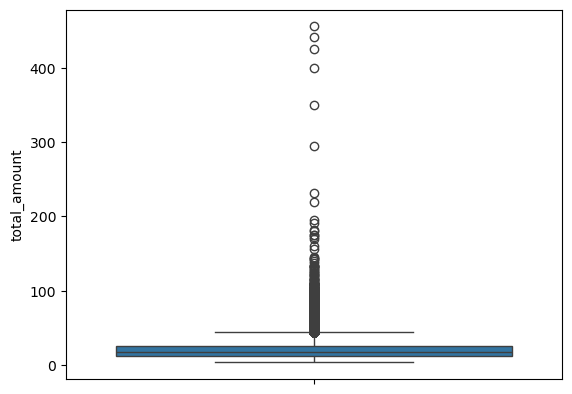

In [28]:
sns.boxplot(df['total_amount'])
plt.show()

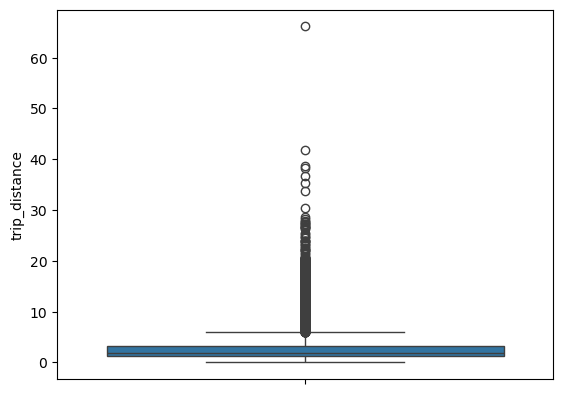

In [29]:
sns.boxplot(df['trip_distance'])
plt.show()

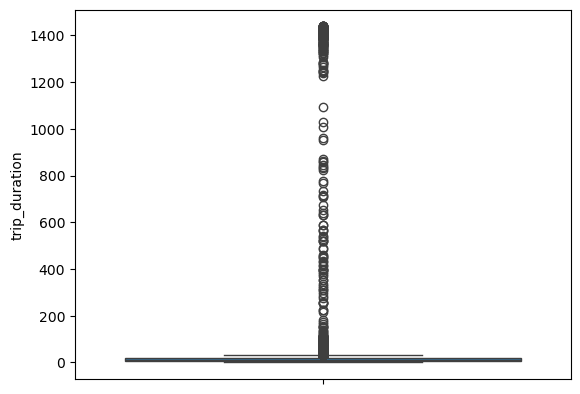

In [30]:
sns.boxplot(df['trip_duration'])
plt.show()

Dari beberapa percobaan yang dilakukan untuk mencari waktu perjalanan antar 2 titik di Kota New York melalui Google maps. Waktu terlama yang didapatkan pada hasil percobaan tersebut yang dilakukan pada rush hour adalah 1 jam 30 menit. Sehingga ditentukan untuk data `trip_duration` maksimal adalah 2 jam, sehingga data diatas 2 jam tidak diikutsertakan.

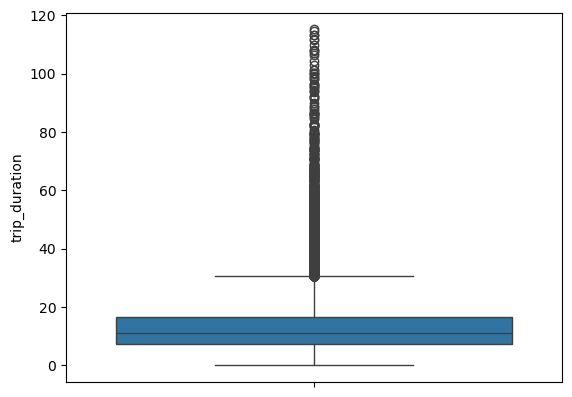

In [31]:
df=df[df['trip_duration']<120]
sns.boxplot(df['trip_duration'])
plt.show()
# sns.scatterplot(data=df,x='trip_duration',y='total_amount')
# plt.show

### Pengecekan menggunakan Scatterplot

<function matplotlib.pyplot.show(close=None, block=None)>

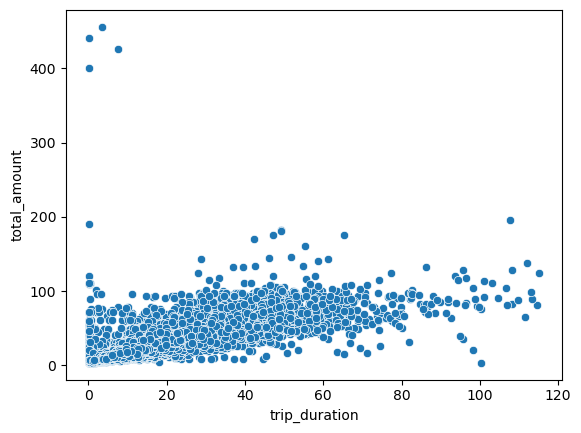

In [32]:
sns.scatterplot(data=df,x='trip_duration',y='total_amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

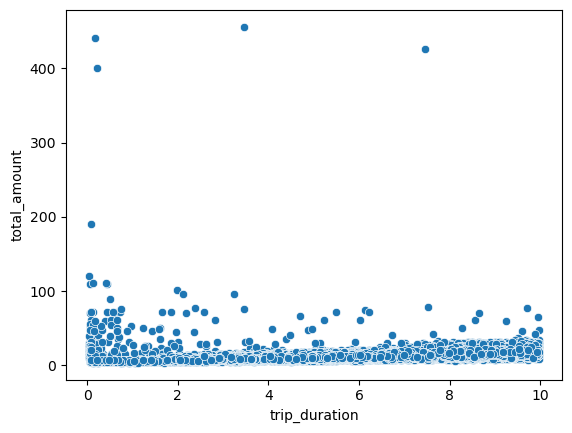

In [33]:
duration_u_10=df[df['trip_duration']<10]
sns.scatterplot(data=duration_u_10,x='trip_duration',y='total_amount')
plt.show

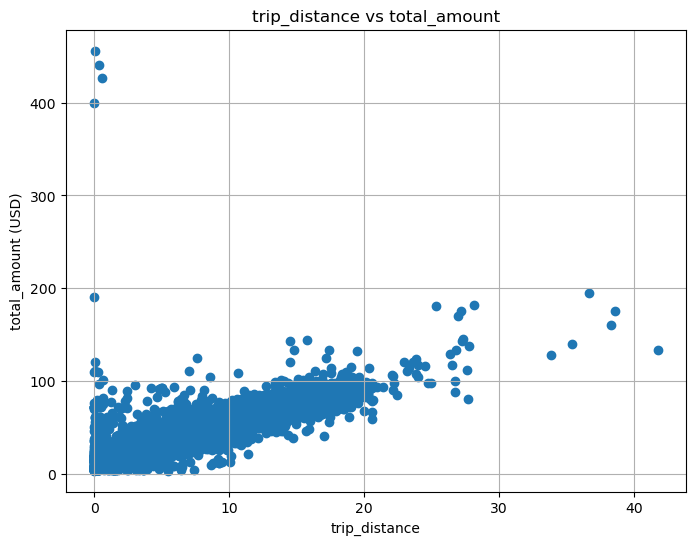

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(data=df,y='total_amount',x='trip_distance')
plt.title('trip_distance vs total_amount')
plt.xlabel('trip_distance')
plt.ylabel('total_amount (USD)')
plt.grid()
plt.show()

Terdapat anomali pada saat `total_amount` diatas 300 USD, maka akan saya hapus.

<function matplotlib.pyplot.show(close=None, block=None)>

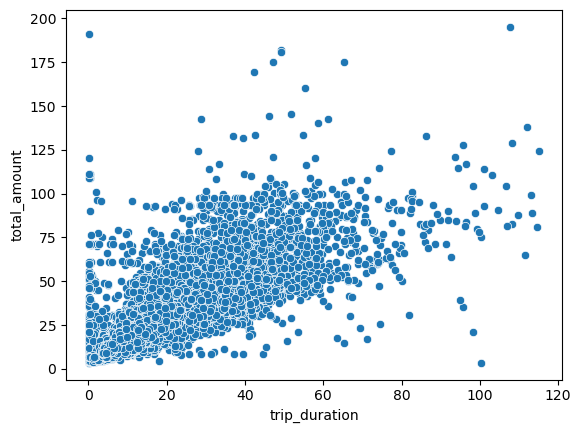

In [35]:
df=df[df['total_amount']<300]
sns.scatterplot(data=df,x='trip_duration',y='total_amount')
plt.show

# Data Analysis

Menganalisa tren jumlah perjalanan taksi di Kota New York selama rentang Januari 2023.

In [39]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# agg_count_daily=df.groupby('day')['trip_duration'].count().reset_index()
agg_count_daily=df['day'].value_counts().reset_index()
agg_count_daily['day'] = pd.Categorical(agg_count_daily['day'], categories=day_order, ordered=True)
agg_count_daily

,day,count
0,Tuesday,9853
1,Thursday,8888
2,Monday,8717
3,Friday,8698
4,Wednesday,8650
5,Saturday,7403
6,Sunday,7178


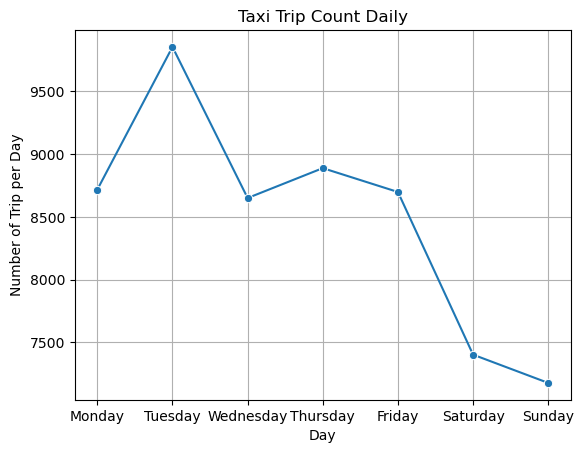

In [40]:
sns.lineplot(data=agg_count_daily,x='day',y='count',marker='o')
plt.title('Taxi Trip Count Daily')
plt.xlabel('Day')
plt.ylabel('Number of Trip per Day')
plt.grid()
plt.show()

In [ ]:
agg_count_hour=(df.groupby('hour')['tip_amount'].count().reset_index().rename(columns={'tip_amount':'count'}))
agg_count_hour

,hour,count
0,0,942
1,1,736
2,2,516
3,3,460
4,4,337
5,5,326
6,6,802
7,7,2254
8,8,2702
9,9,2970


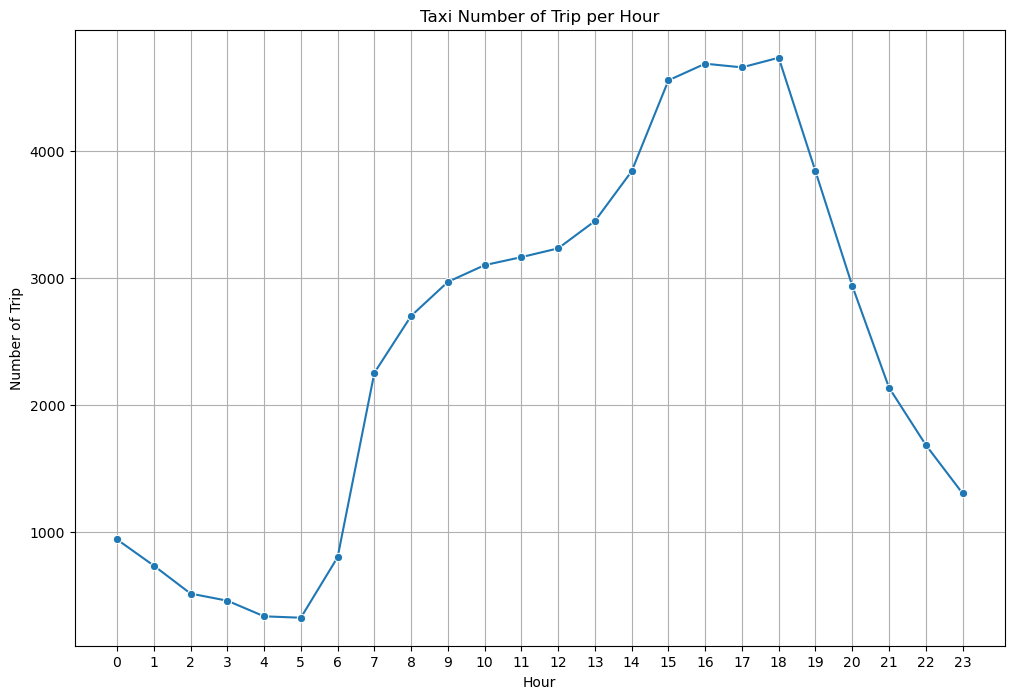

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=agg_count_hour,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.xticks(np.arange(0,24))
plt.grid()
plt.show()

Terlihat dari grafik diatas terlihat hari selasa merupakan hari dengan jumlah perjalanan terbanyak sedangkan hari minggu adalah hari dengan jumlah perjalanan paling sedikit. 

Lalu dari data perjalanan perjam, terlihat peningkatan jumlah perjalanan dari pukul 5 pagi hingga puncaknya pada pukur 18 sore. Selanjutnya jumlah perjalanan taksi terus menurun.

In [45]:
count_pu_borough=df['PU_Borough'].value_counts().reset_index()
count_do_borough=df['DO_Borough'].value_counts().reset_index()
display(count_pu_borough,count_do_borough)

,PU_Borough,count
0,Manhattan,36272
1,Queens,15494
2,Brooklyn,7065
3,Bronx,548
4,Staten Island,8


,DO_Borough,count
0,Manhattan,36179
1,Queens,15329
2,Brooklyn,6136
3,Bronx,1716
4,EWR,19
5,Staten Island,8


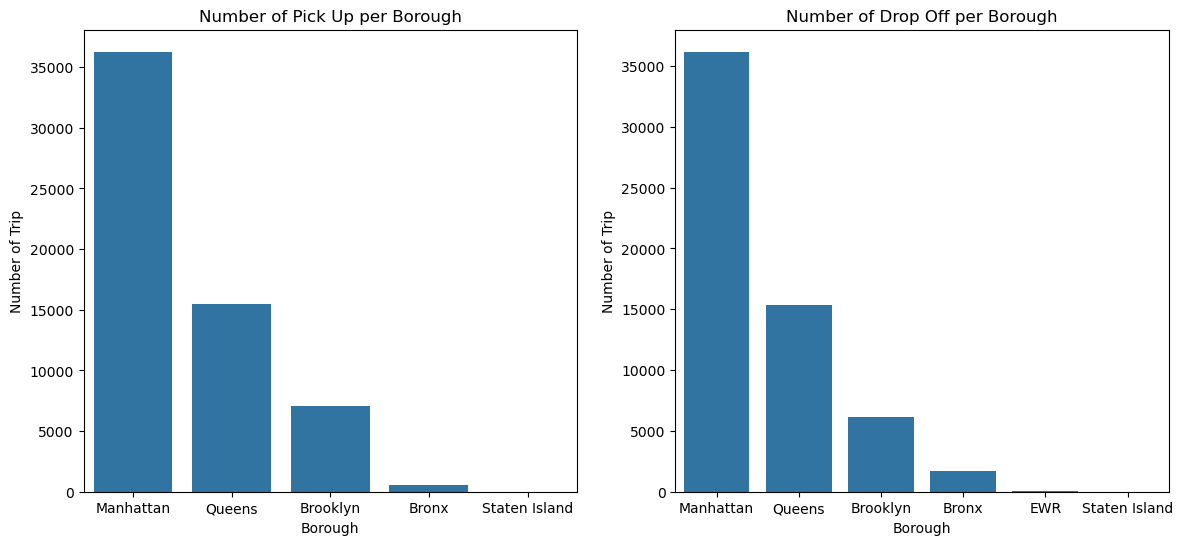

In [46]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(data=count_pu_borough, x='PU_Borough', y='count')
plt.title('Number of Pick Up per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trip')
plt.subplot(1,2,2)
sns.barplot(data=count_do_borough, x='DO_Borough', y='count')
plt.title('Number of Drop Off per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trip')
plt.show()

Terlihat dari grafik di atas, Manhattan merupakan Borough dengan jumlah pick up dan drop off terbanyak. Hal ini terjadi karena Manhattan merupakan pusat komersial, keuangan, dan budaya kota, dengan banyak landmark, tempat wisata, museum, dan universitas.

In [47]:
count_pu_zone=df['PU_Zone'].value_counts().reset_index().head(10)
count_do_zone=df['DO_Zone'].value_counts().reset_index().head(10)
display(count_pu_zone,count_do_zone)

,PU_Zone,count
0,East Harlem North,12598
1,East Harlem South,8542
2,Forest Hills,3608
3,Central Harlem,3593
4,Morningside Heights,3542
5,Central Park,2809
6,Elmhurst,2748
7,Fort Greene,2053
8,Astoria,1603
9,Washington Heights South,1586


,DO_Zone,count
0,East Harlem South,3276
1,East Harlem North,3168
2,Upper East Side North,2604
3,Central Harlem,2439
4,Upper West Side North,2199
5,Central Harlem North,2151
6,Morningside Heights,2124
7,Yorkville West,1468
8,Forest Hills,1466
9,Manhattan Valley,1377


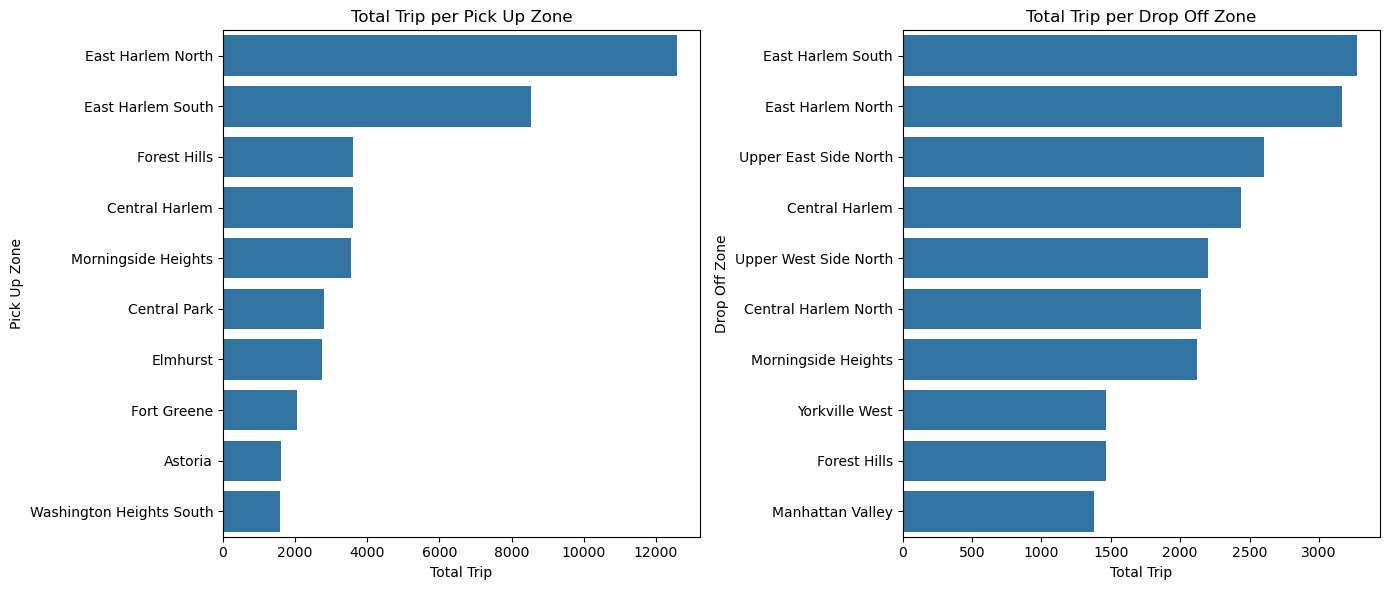

In [48]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.barplot(data=count_pu_zone, y='PU_Zone', x='count')
plt.title('Total Trip per Pick Up Zone')
plt.xlabel('Total Trip')
plt.ylabel('Pick Up Zone')
plt.subplot(1,2,2)
sns.barplot(data=count_do_zone, y='DO_Zone', x='count')
plt.title('Total Trip per Drop Off Zone')
plt.xlabel('Total Trip')
plt.ylabel('Drop Off Zone')
plt.tight_layout()
plt.show()

In [78]:
df_manhattan=df[df['PU_Borough']=='Manhattan']
df_brooklyn=df[df['PU_Borough']=='Brooklyn']
df_queens=df[df['PU_Borough']=='Queens']
df_bronx=df[df['PU_Borough']=='Bronx']
df_staten_island=df[df['PU_Borough']=='Staten Island']
df_ewr=df[df['PU_Borough']=='EWR']


In [81]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Manhattan
agg_count_daily_man=df_manhattan['day'].value_counts().reset_index()
agg_count_daily_man['day'] = pd.Categorical(agg_count_daily_man['day'], categories=day_order, ordered=True)
agg_count_hour_man=df_manhattan['hour'].value_counts().reset_index()
# Brooklyn
agg_count_daily_brok=df_brooklyn['day'].value_counts().reset_index()
agg_count_daily_brok['day'] = pd.Categorical(agg_count_daily_brok['day'], categories=day_order, ordered=True)
agg_count_hour_brok=df_brooklyn['hour'].value_counts().reset_index()
# Queens
agg_count_daily_queens=df_queens['day'].value_counts().reset_index()
agg_count_daily_queens['day'] = pd.Categorical(agg_count_daily_queens['day'], categories=day_order, ordered=True)
agg_count_hour_queens=df_queens['hour'].value_counts().reset_index()
# Bronx
agg_count_daily_bronx=df_bronx['day'].value_counts().reset_index()
agg_count_daily_bronx['day'] = pd.Categorical(agg_count_daily_bronx['day'], categories=day_order, ordered=True)
agg_count_hour_bronx=df_queens['hour'].value_counts().reset_index()
# Staten Island
agg_count_daily_si=df_staten_island['day'].value_counts().reset_index()
agg_count_daily_si['day'] = pd.Categorical(agg_count_daily_si['day'], categories=day_order, ordered=True)
agg_count_hour_si=df_staten_island['hour'].value_counts().reset_index()
# EWR
# Staten Island
agg_count_daily_ewr=df_ewr['day'].value_counts().reset_index()
agg_count_daily_ewr['day'] = pd.Categorical(agg_count_daily_ewr['day'], categories=day_order, ordered=True)
agg_count_hour_ewr=df_ewr['hour'].value_counts().reset_index()

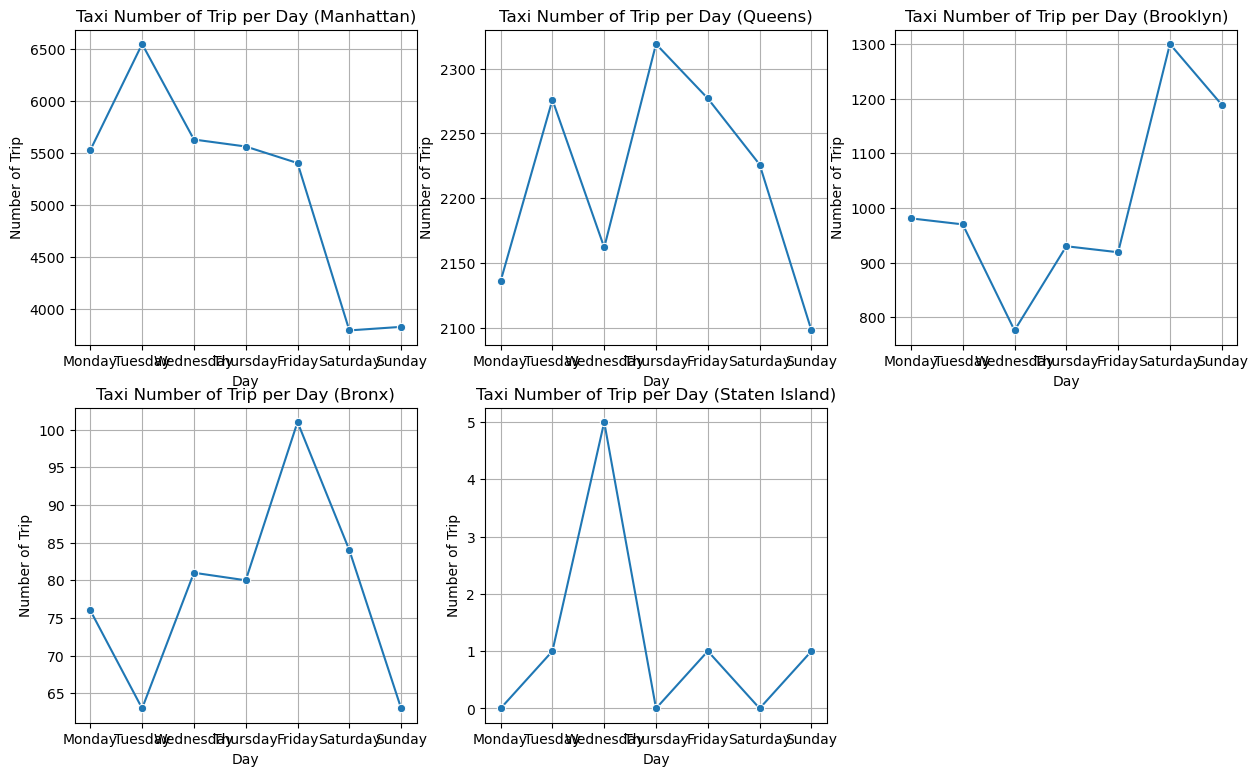

In [85]:
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
sns.lineplot(data=agg_count_daily_man,x='day',y='count',marker='o')
plt.title('Taxi Number of Trip per Day (Manhattan)')
plt.xlabel('Day')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,2)
sns.lineplot(data=agg_count_daily_queens,x='day',y='count',marker='o')
plt.title('Taxi Number of Trip per Day (Queens)')
plt.xlabel('Day')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,3)
sns.lineplot(data=agg_count_daily_brok,x='day',y='count',marker='o')
plt.title('Taxi Number of Trip per Day (Brooklyn)')
plt.xlabel('Day')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,4)
sns.lineplot(data=agg_count_daily_bronx,x='day',y='count',marker='o')
plt.title('Taxi Number of Trip per Day (Bronx)')
plt.xlabel('Day')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,5)
sns.lineplot(data=agg_count_daily_si,x='day',y='count',marker='o')
plt.title('Taxi Number of Trip per Day (Staten Island)')
plt.xlabel('Day')
plt.ylabel('Number of Trip')
plt.grid()

Terlihat pola perjalanan yang berbeda pada setiap Borough, terutama perjalanan harian yang terjadi di Brooklyn, dimana perjalanan tertinggi terjadi pada hari sabtu dan minggu. 

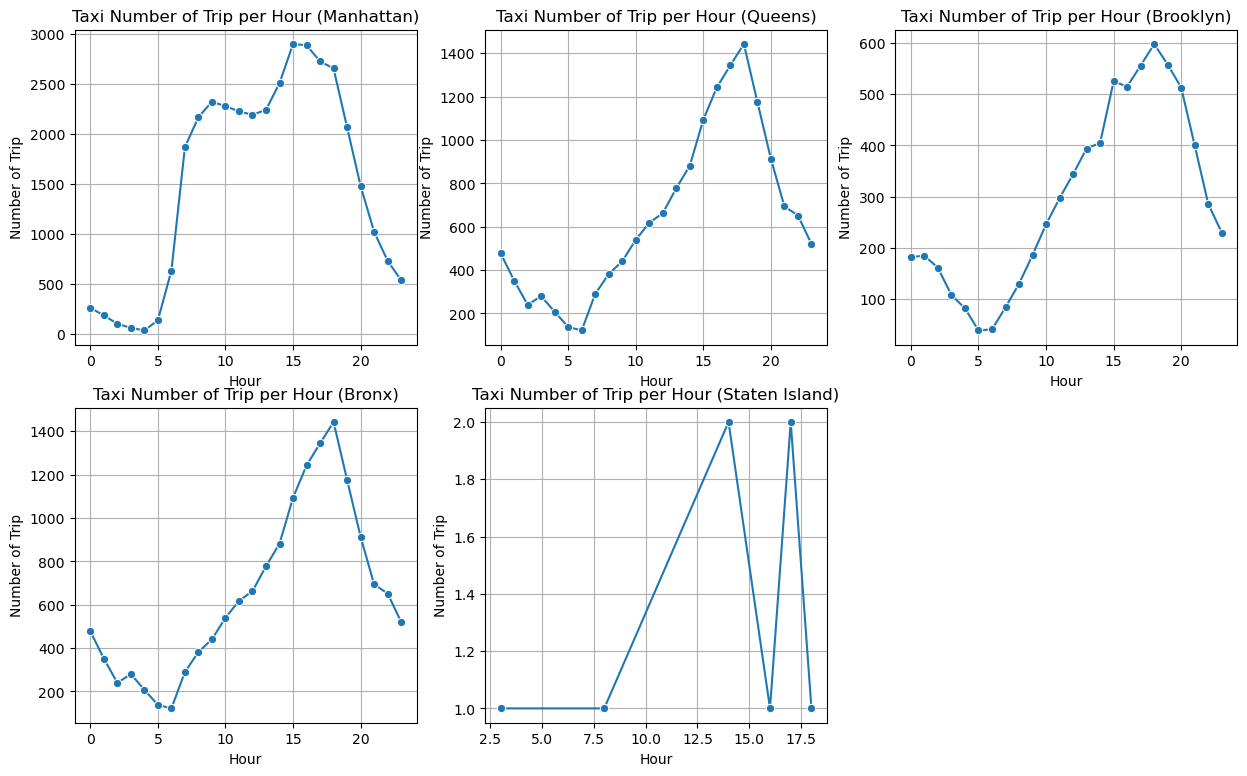

In [88]:
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
sns.lineplot(data=agg_count_hour_man,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour (Manhattan)')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,2)
sns.lineplot(data=agg_count_hour_queens,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour (Queens)')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,3)
sns.lineplot(data=agg_count_hour_brok,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour (Brooklyn)')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,4)
sns.lineplot(data=agg_count_hour_bronx,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour (Bronx)')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.grid()

plt.subplot(2,3,5)
sns.lineplot(data=agg_count_hour_si,x='hour',y='count',marker='o')
plt.title('Taxi Number of Trip per Hour (Staten Island)')
plt.xlabel('Hour')
plt.ylabel('Number of Trip')
plt.grid()
plt.show()


Secara umum, tidak ada perbedaan signifikan pada perjalanan tiap jam pada setiap Borough. Kecuali pada Staten Island, karena sedikitnya perjalanan yang terjadi pada Borough tersebut.

# Kesimpulan

1. Pengumpulan data yang kurang baik, dimana 99% taksi tidak menyimpan data perjalanannya dalam penyimpanan taksi sebelum dikirim ke vendor karena kurangnya koneksi pada server.

1. Secara berurutan, Borough di Kota New York yang memiliki perjalanan tertinggi pada Januari 2023 adalah Manhattan, Queens, Brooklyn, Bronx lalu Staten Island

1. Lalu Zona yang memiliki jumlah keberangkatan tertinggi adalah East Harlem North, East Harlem South, Forest Hills, Central Harlem dan Morningside Heights> dan zona yang memiliki jumlah akhir tujuan tertinggi adalah East Harlem South, East Harlem North, Upper East Side North, Central Harlem dan Upper West Side North.

1. Secara umum, tidak ada perbedaan signifikan pada perjalanan tiap jam pada setiap Borough. Kecuali pada Staten Island, karena sedikitnya perjalanan yang terjadi pada Borough tersebut.

1. Terlihat pola perjalanan yang berbeda pada setiap Borough, terutama perjalanan harian yang terjadi di Brooklyn, dimana perjalanan tertinggi terjadi pada hari sabtu dan minggu. Meski begitu, jumlah perjalanan pada akhir pekan di Brooklyn masih lebih kecil dibandingkan dengan jumlah perjalanan akhir pekan di Manhattan dan Queens.

# Rekomendasi

1. Agar pengumpulan data bisa lebih baik, vendor bisa meningkatkan kualitas koneksi server.

1. Peningkatan layanan pada Borough tertentu. Karena tingginya jumlah perjalanan yang terjadi di Manhattan, Queens dan Brooklyn, maka dapat dilakukan peningkatan layanan seperti penambahan armada taksi atau meningkatkan kehadiran taksi. Terutama pada zona East Harlem Southdan dan East Harlem North karena kedua zona tersebut merupakan zona dengan jumlah perjalanan tertinggi, baik secara keberangkatan maupun secara tujuan akhir.